In [1]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
import numpy as np


In [11]:
import pandas as pd

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.datasets import load_boston

In [14]:
load_boston()

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [15]:
import boto3

# Let's use Amazon S3
s3 = boto3.resource('s3')

In [16]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

mouniawsbucket


In [21]:
!pip install s3fs

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [29]:
import boto3
bucket_name = 'mouniawsbucket' # <--- CHANGE THIS VARIABLE TO A UNIQUE NAME FOR YOUR BUCKET
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [30]:
client = boto3.client('s3')

In [31]:
path = 's3://mouniawsbucket/train-1.csv'

In [32]:
df = pd.read_csv(path)

In [33]:
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [34]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [35]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

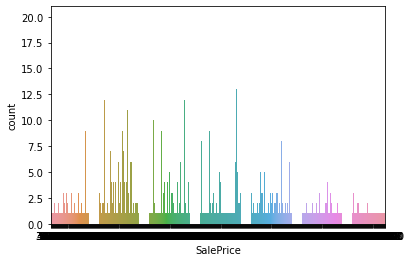

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='SalePrice',data=df)
plt.show()

In [41]:
df.shape

(1460, 81)

In [42]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [43]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [46]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


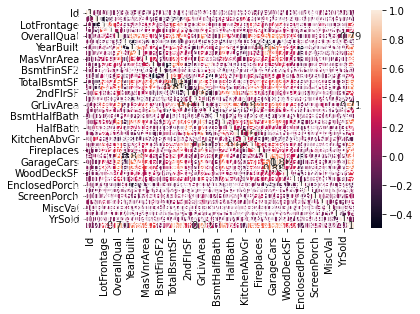

In [47]:
sns.heatmap(df.corr(),annot=True);

In [51]:
 from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [53]:
features = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [60]:
# importing required libraries
# importing Scikit-learn library and datasets package
from sklearn import datasets 
 
# Loading the iris plants dataset (classification)
iris = datasets.load_iris()

In [61]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [62]:
# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)
 
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [65]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# creating dataframe of IRIS dataset
data = pd.DataFrame({'train1': iris.data[:, 0], 'train2': iris.data[:, 1],
                     'test1': iris.data[:, 2], 'test2': iris.data[:, 3]})

In [66]:
print(data.head())

   train1  train2  test1  test2
0     5.1     3.5    1.4    0.2
1     4.9     3.0    1.4    0.2
2     4.7     3.2    1.3    0.2
3     4.6     3.1    1.5    0.2
4     5.0     3.6    1.4    0.2


In [67]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 

In [68]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9333333333333333


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dc = DecisionTreeClassifier().fit(X_train,y_train)

In [71]:
y_pred = dc.predict(X_test)

In [72]:
y_pred,y_pred

(array([0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
        0]),
 array([0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
        0]))

In [73]:
y_pred,y_test

(array([0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
        0]),
 array([0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1,
        0]))

In [74]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      0.93      0.90        14
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [77]:
from sklearn import tree

[Text(125.55000000000001, 199.32, 'X[3] <= 0.7\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(83.7, 163.07999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(83.7, 126.83999999999999, 'X[2] <= 5.25\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(125.55000000000001, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.102\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(209.25, 90.6, 'X[0] <= 6.5\ngini = 0.346\nsamples = 9\nvalue = [0, 2, 7]'),
 Text(167.4, 54.359999999999985, 'X[1] <= 3.1\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(209.25, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000

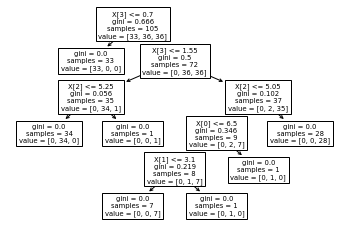

In [78]:
tree.plot_tree(dc)